In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(200,3,12)
	tree = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = "Energy", percentileTarget = 90, percentileAvoid = 10)
	print("Labels: ")
	print(tree.classes_)
	print("Importances: ")
	print(tree.feature_importances_)

[ -24  -75 -102 -150 -120  -21  -60  -72  -66 -108  -48  -18 -144 -114  -42
 -141  -69 -189  -96 -132 -159  -84 -180  -57 -126  -51 -105 -183 -195  -33
 -186  -99  -45  -78  -39  -81 -201]
[-153  -27 -177 -168  -90 -192  -63 -174  -87 -156 -171  -36]
[-138  -54 -111 -123 -117  -93  -30 -165 -129 -198 -147 -135 -162]
Index: -24
0.0 percent complete with preparing data.


/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:166: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


Index: -75
2.7027027027027026 percent complete with preparing data.
Index: -102
5.405405405405405 percent complete with preparing data.
Index: -150
8.108108108108109 percent complete with preparing data.
Index: -120
10.81081081081081 percent complete with preparing data.
Index: -21
13.513513513513514 percent complete with preparing data.
Index: -60
16.216216216216218 percent complete with preparing data.
Index: -72
18.91891891891892 percent complete with preparing data.
Index: -66
21.62162162162162 percent complete with preparing data.
Index: -108
24.324324324324326 percent complete with preparing data.
Index: -48
27.027027027027028 percent complete with preparing data.
Index: -18
29.72972972972973 percent complete with preparing data.
Index: -144
32.432432432432435 percent complete with preparing data.
Index: -114
35.13513513513514 percent complete with preparing data.
Index: -42
37.83783783783784 percent complete with preparing data.
Index: -141
40.54054054054054 percent complete wit

In [5]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(tree, startIndex = i, endIndex = i+11, features = featureList, sector = "Energy")
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:166: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


0 above 90th percentile: 0.103790613718
0 above 75th percentile: 0.25
0 above 50th percentile: 0.492779783394
0 above 25th percentile: 0.740072202166
0 above 10th percentile: 0.888086642599
5 above 90th percentile: 0.103790613718
5 above 75th percentile: 0.25
5 above 50th percentile: 0.492779783394
5 above 25th percentile: 0.740072202166
5 above 10th percentile: 0.888086642599
10 above 90th percentile: 0.104457109666
10 above 75th percentile: 0.250679953287
10 above 50th percentile: 0.491329294151
10 above 25th percentile: 0.738376412715
10 above 10th percentile: 0.887317332064
15 above 90th percentile: 0.10638744687
15 above 75th percentile: 0.252566410461
15 above 50th percentile: 0.493049286145
15 above 25th percentile: 0.736332512393
15 above 10th percentile: 0.885232951193
20 above 90th percentile: 0.114257710383
20 above 75th percentile: 0.264228378882
20 above 50th percentile: 0.50135636944
20 above 25th percentile: 0.730436174029
20 above 10th percentile: 0.88304479751
25 above

Counts: 
[114, 114, 114, 111, 106, 94, 66, 45, 22, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


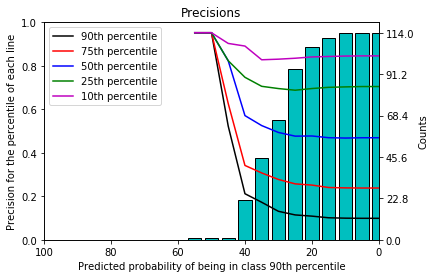

In [7]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.title("Precisions")
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [ ]:
fig.savefig(str(time.time()) + 'test.jpg')
plt.show()